# Welcome to the world of Whole slide images!

## What is a Whole Slide Image (WSI)?

Welcome to our tutorial series! In this first lesson, we'll explore the fascinating world of Whole Slide Images (WSI).

Whole slide imaging (WSI) refers to the digital versions of histological slides, which are typically stained using [H&E stains](https://en.wikipedia.org/wiki/H%26E_stain) (Hematoxylin and Eosin) or [IHC stains](https://en.wikipedia.org/wiki/Immunohistochemistry) (Immunohistochemistry). Using specialized digital scanners that combine high-resolution cameras with microscopy technology, we can create incredibly detailed digital versions of tissue slides that capture even the finest subcellular structures.

What makes WSI particularly unique compared to other imaging data is its enormous file size, which can easily reach several gigabytes even after compression. This substantial size presents special challenges for processing and analyzing these images, as it's often impossible to load the entire high-resolution image into memory at once. Don't worry though - we'll show you elegant solutions to handle this challenge!

## The pyramid structure in WSI: A clever solution

One of the most ingenious aspects of WSI technology is the pyramid structure. Think of it as storing the same image at multiple resolutions, creating a stack of layers. At the base (level 0), you have the full-resolution image with all its detail. As you move up the pyramid (to levels 1, 2, 3, etc.), each level contains a progressively lower-resolution version of the same image.

This brilliant design elegantly solves the problem of WSI's massive file size in the following way:
- When you want an overview of the entire slide, the system can quickly load a low-resolution version from the top of the pyramid
- When you need to examine a specific area in detail, only that small region is loaded at high resolution
- This approach means you never need to load the entire gigabyte-sized high-resolution image at once

The pyramid structure makes navigating and analyzing WSI files not only possible but remarkably efficient, even on standard computers. It's a perfect example of how clever data structures can overcome significant technical challenges!

<img src='https://github.com/rendeirolab/LazySlide/blob/main/assets/WSI_intro.png?raw=true' width="500">

## Understanding WSI file formats

As you begin working with whole slide images, you'll encounter various file formats. Let's take a moment to understand the landscape of WSI file formats available in the field.

Below is a helpful table of common WSI file formats you might encounter. It's worth noting that most of these formats are proprietary, which means you can read the files using specialized software but typically cannot create them without the vendor's tools. The exception is `.tiff`, which is an open-source file format that offers more flexibility for both reading and writing.

<table border="1">
    <thead>
        <tr>
            <th>Format</th>
            <th>File Extensions</th>
            <th>Vendor</th>
            <th>Notes</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Aperio</td>
            <td>.svs, .tif</td>
            <td>Leica Biosystems</td>
            <td>Supports multiple compression formats.</td>
        </tr>
        <tr>
            <td>Hamamatsu</td>
            <td>.vms, .vmu, .ndpi</td>
            <td>Hamamatsu</td>
            <td>Widely used in digital pathology.</td>
        </tr>
        <tr>
            <td>Leica</td>
            <td>.scn</td>
            <td>Leica Biosystems</td>
            <td>Used in clinical and research applications.</td>
        </tr>
        <tr>
            <td>Mirax</td>
            <td>.mrxs</td>
            <td>3DHISTECH</td>
            <td>Can contain multiple images per slide.</td>
        </tr>
        <tr>
            <td>Philips</td>
            <td>.tiff</td>
            <td>Philips</td>
            <td>Optimized for pathology workflows.</td>
        </tr>
        <tr>
            <td>Sakura</td>
            <td>.svslide</td>
            <td>Sakura Finetek</td>
            <td>Less commonly used format.</td>
        </tr>
        <tr>
            <td>Trestle</td>
            <td>.tif</td>
            <td>Trestle Corporation</td>
            <td>Older format, may have compatibility issues.</td>
        </tr>
        <tr>
            <td>Ventana</td>
            <td>.bif</td>
            <td>Roche</td>
            <td>Supports multi-layer images.</td>
        </tr>
        <tr>
            <td>DICOM</td>
            <td>.dcm</td>
            <td>Standard</td>
            <td>Medical imaging standard; support may vary.</td>
        </tr>
        <tr>
            <td>Zeiss</td>
            <td>.czi</td>
            <td>Zeiss</td>
            <td>High-resolution imaging format.</td>
        </tr>
        <tr>
            <td>Generic TIFF</td>
            <td>.tif, .tiff</td>
            <td>Various</td>
            <td>Common format; may lack specific WSI metadata.</td>
        </tr>
    </tbody>
</table>

# Let's Get Hands-On with a Real WSI!

Now that we've covered the theoretical aspects of whole slide images, let's put our knowledge into practice! In this hands-on section, we'll use a real [GTEx histology](https://gtexportal.org/home/histologyPage) slide as our example. This practical exercise will help you understand different aspects of WSI that will be valuable for your downstream analysis.

Don't worry if you encounter concepts that seem unfamiliar at this stage - that's completely normal when learning a new technology. We'll cover all the essential details in the upcoming sections where we'll explore how to use the powerful `LazySlide` and `wsidata` libraries to work with these complex images.

## Step 1: Loading our first slide file

First, let's download and load a whole slide image. We'll use the `pooch` library to retrieve a sample slide from the GTEx project. This library helps us download and cache the file, so we only need to download it once.

In [1]:
from huggingface_hub import hf_hub_download

slide = hf_hub_download(
    "rendeirolab/lazyslide-data", 
    "GTEX-1117F-0526.svs", 
    repo_type="dataset",
    cache_dir="."
)

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


WSI: datasets--rendeirolab--lazyslide-data/snapshots/3ae589f240b9897db973b706f77636559b100696/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
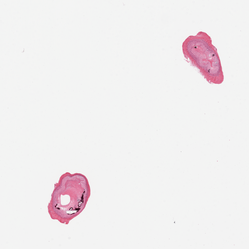

In [2]:
from wsidata import open_wsi

# Now we'll open the slide using the open_wsi function from wsidata
# This creates a WSIData object that contains both the image and associated metadata
wsi = open_wsi(slide)

# Let's examine what's in our WSI object
wsi

## Step 2: Visualizing our whole slide image

Now that we've loaded our WSI, let's visualize it! One of the great features of LazySlide is how easy it makes viewing these complex images. We'll use the `tissue` function from the plotting module to display our slide.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


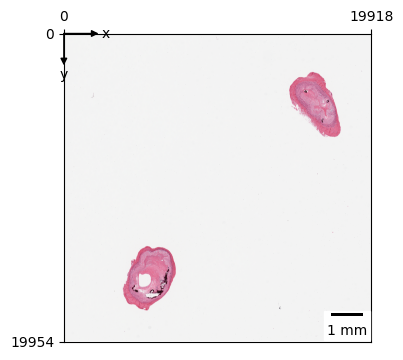

In [3]:
import lazyslide as zs

zs.pl.tissue(wsi)

## Step 3: Exploring the pyramid structure

Let's examine the pyramid structure in our example WSI. You'll notice that this slide has 3 levels in its pyramid. This is a perfect opportunity to observe how the pyramid structure works in practice!

As we move up the pyramid (as the level number increases), you'll see that:
1. The image dimensions (height and width) become progressively smaller
2. The downsample factor becomes progressively larger

This relationship demonstrates exactly how the pyramid structure efficiently stores multiple resolutions of the same image.

:::{tip}
The downsample factor always uses the level 0 as reference.
:::

In [4]:
wsi.fetch.pyramids()

,height,width,downsample
level,,,
0,19958,19919,1.000000
1,4989,4979,4.000502
2,2494,2489,8.002609


## Step 4: Understanding WSI properties

Now let's explore the important properties of our whole slide image. These properties provide essential information about the image's dimensions, resolution, and other characteristics that are crucial for analysis.

- **shape**: The dimensions of the full-resolution image in pixels, given as `[width, height]`.
- **n_level**: The number of resolution levels available in the image pyramid, including the full resolution.
- **level_shape**: A list of the dimensions for each level in the pyramid, starting from the full resolution down to the lowest resolution.
- **level_downsample**: The downsample factors for each level compared to the full resolution, indicating how much each level is scaled down.
- **mpp** (Microns per Pixel): The physical size of one pixel in micrometers, indicating the scanning resolution.
- **magnification**: The optical magnification used during scanning, which helps in understanding the scale of the captured image.
- **bounds**: The coordinates of the bounding box that defines the image area on the slide, given as `[x, y, width, height]`.


:::{note}
The **mpp** and **magnification** are related to each other:

- 20X magnification ≈ 0.5 mpp
- 40X magnification ≈ 0.25 mpp

These values are useful for harmonizing slides scanned at different resolutions.
:::

In [5]:
wsi.properties

Field,Value
shape,"[19958, 19919]"
n_level,3
level_shape,"[[19958, 19919], [4989, 4979], [2494, 2489]]"
level_downsample,"[1.0, 4.000501706284455, 8.002609074152414]"
mpp,0.4942
magnification,20.0
bounds,"[0, 0, 19919, 19958]"
